In [56]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons

# 반달 모양 두 개의 클래스 데이터 생성
data, cls = make_moons(n_samples=300, noise=0.05, random_state=1234)

df = pd.DataFrame(data, columns=["X", "Y"])
df.head()

,X,Y
0,0.021584,0.204225
1,0.484300,-0.392534
2,0.075986,1.008658
3,-0.002046,0.223251
4,-0.717494,0.606368


In [57]:
from sklearn.cluster import DBSCAN # Density-Based Spatial Clustering of Applications with Noise

# 두 점을 서로 이웃으로 간주하는 최소 거리 0.2
# DBSCAN 클러스터링, 코어 포인트(Core Point)가 되기 위한 최소 이웃의 수 = 19 (자기 자신은 제외) => 20
dbscan = DBSCAN(eps=0.2, min_samples=20)
df['label'] = dbscan.fit_predict(df)
df.head()

,X,Y,label
0,0.021584,0.204225,-1
1,0.484300,-0.392534,3
2,0.075986,1.008658,1
3,-0.002046,0.223251,-1
4,-0.717494,0.606368,0


In [58]:
df['label'].value_counts()

-1    97
 0    47
 3    37
 2    36
 6    23
 5    22
 4    21
 1    17
Name: label, dtype: int64

In [59]:
# 이상치(노이즈)의 개수
(df['label'] == -1).sum()

97

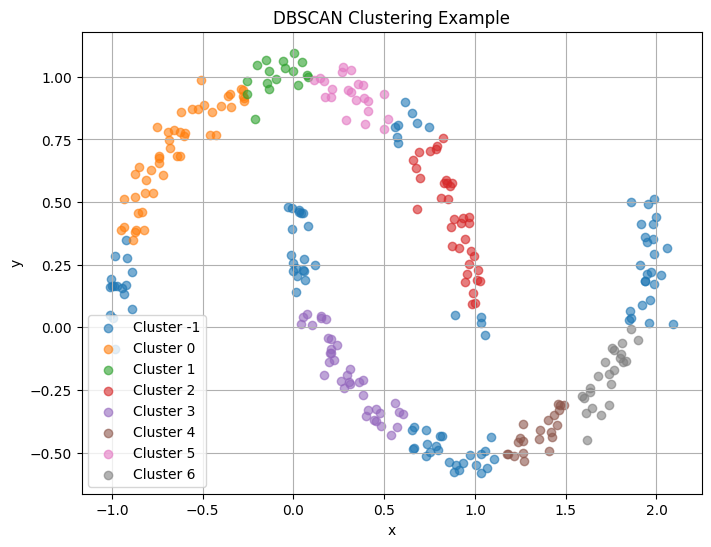

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
for label in sorted(df['label'].unique()):
    cluster = df[df['label'] == label]
    plt.scatter(cluster['X'], cluster['Y'], label=f'Cluster {label}', alpha=0.6)
plt.legend()

plt.title('DBSCAN Clustering Example')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()